In [103]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA

In [136]:
df = pd.read_excel(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Products.xlsx")
df = df.set_index('Cust_ID')
df.columns = df.columns.str.replace("&", "_")

In [137]:
df["total_spent"] = df["Fitness_Gym"] + df["Hiking_Running"] + df["TeamGames"] + df["OutdoorActivities"] 
df["total_spent_avg"] = df["total_spent"] / df["TotalProducts"]

In [138]:
df["bins"] = pd.cut(df["total_spent_avg"], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(int)

In [139]:
df["Fitness_Gym_pct"] = df["Fitness_Gym"] / df["total_spent"]
df["Hiking_Running_pct"] = df["Hiking_Running"] / df["total_spent"]
df["TeamGames_pct"] = df["TeamGames"] / df["total_spent"]
df["OutdoorActivities_pct"] = df["OutdoorActivities"] / df["total_spent"]

In [140]:
df["days_since_last_purchase"] = datetime.today() -  df["Last_Purchase"]
df["days_since_last_purchase"] = df["days_since_last_purchase"].dt.days

In [120]:
df

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase
Cust_ID,,,,,,,,,,,,,,
4,0,76,2024-02-19,248,37,6,361,60.166667,3,0.000000,0.210526,0.686981,0.102493,57
5,0,75,2024-02-17,248,37,6,360,60.000000,3,0.000000,0.208333,0.688889,0.102778,59
6,6,69,2024-02-15,215,34,5,324,64.800000,3,0.018519,0.212963,0.663580,0.104938,61
9,36,71,2024-02-13,248,35,8,390,48.750000,2,0.092308,0.182051,0.635897,0.089744,63
10,8,97,2024-02-15,204,34,5,343,68.600000,4,0.023324,0.282799,0.594752,0.099125,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,29,36,2024-02-05,53,32,4,150,37.500000,2,0.193333,0.240000,0.353333,0.213333,71
6491,38,32,2024-02-01,136,34,5,240,48.000000,2,0.158333,0.133333,0.566667,0.141667,75
6492,29,39,2024-02-06,93,34,5,195,39.000000,2,0.148718,0.200000,0.476923,0.174359,70


In [121]:
df_sqrt = df.copy()

In [122]:
df_sqrt["Fitness_Gym"] = np.sqrt(df_sqrt["Fitness_Gym"])
df_sqrt["Hiking_Running"] = np.sqrt(df_sqrt["Hiking_Running"])
df_sqrt["TeamGames"] = np.sqrt(df_sqrt["TeamGames"])
df_sqrt["OutdoorActivities"] = np.sqrt(df_sqrt["OutdoorActivities"])
df_sqrt["total_spent"] = np.sqrt(df_sqrt["total_spent"])
df_sqrt["total_spent_avg"] = np.sqrt(df_sqrt["total_spent_avg"])
df_sqrt["bins"] = np.sqrt(df_sqrt["bins"])
df_sqrt["TotalProducts"] = np.sqrt(df_sqrt["TotalProducts"])

df_sqrt["Fitness_Gym_pct"] = np.sqrt(df_sqrt["Fitness_Gym_pct"])
df_sqrt["Hiking_Running_pct"] = np.sqrt(df_sqrt["Hiking_Running_pct"])
df_sqrt["TeamGames_pct"] = np.sqrt(df_sqrt["TeamGames_pct"])
df_sqrt["OutdoorActivities_pct"] = np.sqrt(df_sqrt["OutdoorActivities_pct"])
df_sqrt["days_since_last_purchase"] = np.sqrt(df_sqrt["days_since_last_purchase"])


In [155]:
df.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'Fitness_Gym_pct', 'Hiking_Running_pct', 'TeamGames_pct',
       'OutdoorActivities_pct', 'days_since_last_purchase'],
      dtype='object')

In [123]:
df_sqrt.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'Fitness_Gym_pct', 'Hiking_Running_pct', 'TeamGames_pct',
       'OutdoorActivities_pct', 'days_since_last_purchase'],
      dtype='object')

In [168]:
df_test = df[["total_spent", "days_since_last_purchase", "TotalProducts"]]


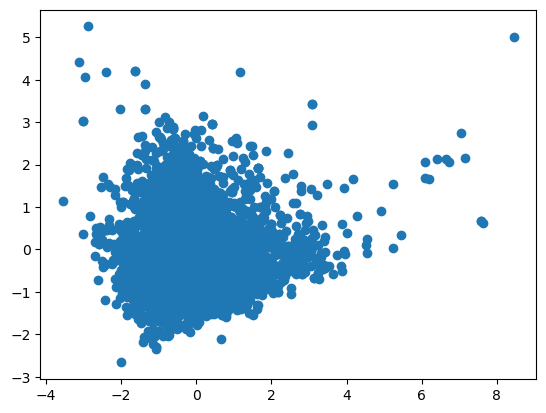

In [179]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_test)

pca_model = PCA(n_components=2)
pc = pca_model.fit_transform(df_scaled)

plt.scatter(pc[:,0], pc[:,1])

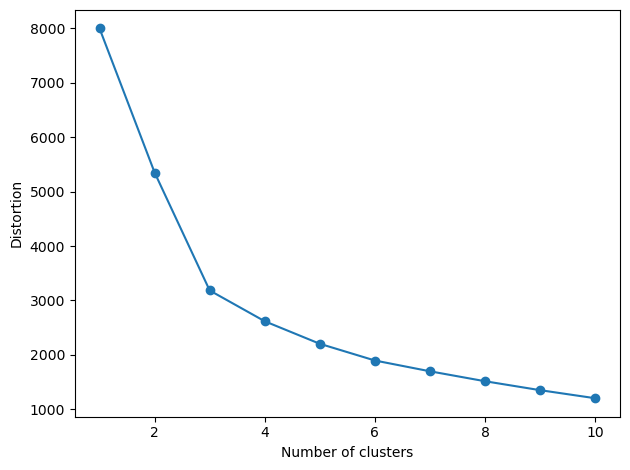

In [159]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(pc)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [170]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

clustered_k = km.fit_predict(pc)

df_clustered = pd.DataFrame(pc, index=df.index)
df_clustered["cluster"] = km.labels_

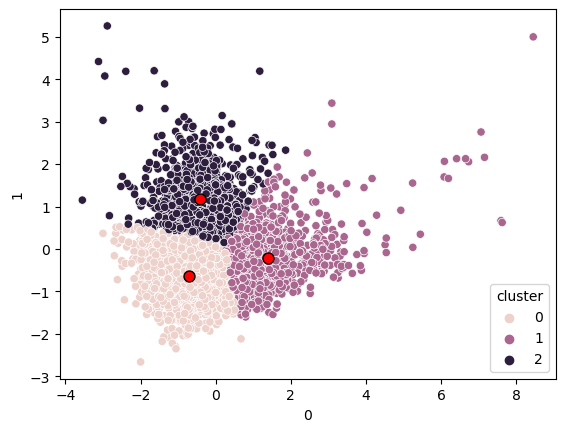

In [171]:
sns.scatterplot(df_clustered, x=df_clustered[0], y=df_clustered[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

In [172]:
df_final = df.merge(df_clustered["cluster"], how='left', left_index=True, right_index=True).copy()

In [173]:
df_final

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase,cluster
Cust_ID,,,,,,,,,,,,,,,
4,0,76,2024-02-19,248,37,6,361,60.166667,3,0.000000,0.210526,0.686981,0.102493,57,1
5,0,75,2024-02-17,248,37,6,360,60.000000,3,0.000000,0.208333,0.688889,0.102778,59,1
6,6,69,2024-02-15,215,34,5,324,64.800000,3,0.018519,0.212963,0.663580,0.104938,61,1
9,36,71,2024-02-13,248,35,8,390,48.750000,2,0.092308,0.182051,0.635897,0.089744,63,1
10,8,97,2024-02-15,204,34,5,343,68.600000,4,0.023324,0.282799,0.594752,0.099125,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,29,36,2024-02-05,53,32,4,150,37.500000,2,0.193333,0.240000,0.353333,0.213333,71,0
6491,38,32,2024-02-01,136,34,5,240,48.000000,2,0.158333,0.133333,0.566667,0.141667,75,0
6492,29,39,2024-02-06,93,34,5,195,39.000000,2,0.148718,0.200000,0.476923,0.174359,70,0


In [174]:
dfm = df_final[["Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "total_spent_avg", "cluster"]].copy()

In [175]:
dfm = dfm.melt(id_vars='cluster')

In [176]:
dfm

,cluster,variable,value
0,1,Fitness_Gym,0.000000
1,1,Fitness_Gym,0.000000
2,1,Fitness_Gym,6.000000
3,1,Fitness_Gym,36.000000
4,1,Fitness_Gym,8.000000
...,...,...,...
19995,0,total_spent_avg,37.500000
19996,0,total_spent_avg,48.000000
19997,0,total_spent_avg,39.000000
19998,0,total_spent_avg,31.000000


<Axes: xlabel='cluster', ylabel='value'>

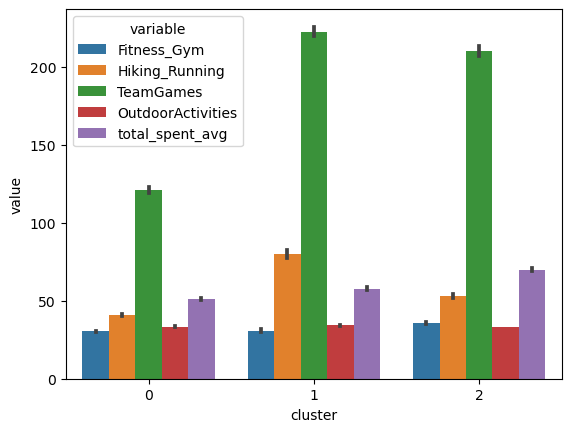

In [177]:
sns.barplot(dfm, x='cluster', y='value', hue='variable')

In [94]:
df.query(' cluster == 0 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,cluster
count,1914.000000,1914.000000,1914,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.0
mean,35.324451,49.693312,2024-01-26 06:07:08.840125440,214.362591,33.294148,5.153083,332.674504,67.539040,3.508882,0.106478,0.149600,0.639953,0.103969,0.0
min,0.000000,13.000000,2023-10-15 00:00:00,101.000000,28.000000,2.000000,181.000000,20.750000,1.000000,0.000000,0.053936,0.521886,0.025510,0.0
25%,27.000000,41.000000,2024-01-13 00:00:00,174.000000,32.000000,4.000000,282.000000,55.525000,3.000000,0.082888,0.128378,0.606875,0.086387,0.0
50%,33.000000,47.000000,2024-01-27 00:00:00,211.000000,33.000000,5.000000,327.000000,65.800000,3.000000,0.104294,0.148202,0.638319,0.101983,0.0
75%,42.000000,55.000000,2024-02-09 00:00:00,252.000000,34.000000,6.000000,378.000000,77.600000,4.000000,0.127581,0.172098,0.672019,0.118940,0.0
max,100.000000,120.000000,2024-02-29 00:00:00,1203.000000,40.000000,16.000000,1372.000000,196.000000,10.000000,0.250000,0.214990,0.876822,0.190217,0.0
std,13.120048,14.097468,NaN,54.064812,1.623049,1.380952,67.682016,17.039352,0.953807,0.033685,0.029169,0.046321,0.020889,0.0


In [93]:
df.query(' cluster == 1 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,cluster
count,1205.000000,1205.000000,1205,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.0
mean,34.132780,37.863071,2024-01-30 10:56:03.983402496,96.021577,33.491286,5.117842,201.508714,41.479739,2.092946,0.171256,0.189765,0.465559,0.173419,1.0
min,0.000000,9.000000,2023-10-31 00:00:00,0.000000,29.000000,2.000000,62.000000,12.000000,1.000000,0.000000,0.076923,0.000000,0.089239,1.0
25%,28.000000,31.000000,2024-01-23 00:00:00,75.000000,32.000000,4.000000,175.000000,33.000000,2.000000,0.142292,0.162393,0.422222,0.147982,1.0
50%,32.000000,37.000000,2024-02-01 00:00:00,98.000000,34.000000,5.000000,200.000000,40.800000,2.000000,0.166667,0.186047,0.484848,0.165877,1.0
75%,38.000000,44.000000,2024-02-09 00:00:00,117.000000,34.000000,6.000000,226.000000,48.250000,2.000000,0.197802,0.211864,0.522613,0.191617,1.0
max,123.000000,102.000000,2024-02-27 00:00:00,203.000000,39.000000,10.000000,381.000000,85.333333,4.000000,0.471264,0.412017,0.600877,0.548387,1.0
std,10.154568,9.796281,NaN,30.225364,1.587210,1.381314,39.981798,11.246222,0.666965,0.044875,0.040874,0.080617,0.040387,0.0


In [95]:
df.query(' cluster == 2 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,cluster
count,881.000000,881.000000,881,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.0
mean,21.952327,93.803632,2024-02-10 01:49:30.715096320,202.433598,34.425653,6.002270,352.615210,61.162464,3.173666,0.060113,0.257511,0.579491,0.102885,2.0
min,0.000000,34.000000,2023-12-13 00:00:00,74.000000,30.000000,3.000000,143.000000,20.150000,1.000000,0.000000,0.181416,0.285303,0.040943,2.0
25%,7.000000,71.000000,2024-02-03 00:00:00,173.000000,33.000000,5.000000,307.000000,51.571429,3.000000,0.022792,0.217241,0.550432,0.087404,2.0
50%,20.000000,82.000000,2024-02-14 00:00:00,208.000000,34.000000,6.000000,350.000000,59.666667,3.000000,0.060274,0.235849,0.596257,0.100000,2.0
75%,31.000000,98.000000,2024-02-20 00:00:00,234.000000,36.000000,7.000000,388.000000,68.500000,4.000000,0.089362,0.270833,0.628788,0.112583,2.0
max,100.000000,464.000000,2024-02-29 00:00:00,384.000000,42.000000,20.000000,806.000000,132.333333,7.000000,0.235849,0.586158,0.701754,0.223776,2.0
std,17.458067,49.534297,NaN,44.511316,1.798794,1.759389,82.184608,15.462332,0.887046,0.043705,0.066902,0.076822,0.025015,0.0
